<a href="https://colab.research.google.com/github/dapousman/ComputerVision2021/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


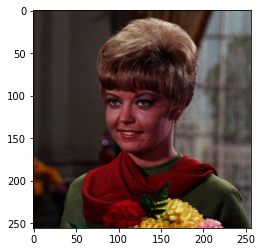

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Experiment 1

Gamma correction on image
-------------------------------
Input Gamma value: 3


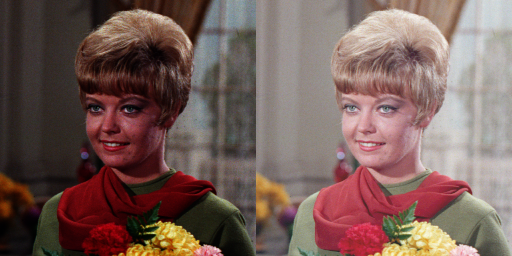

In [6]:
print('Gamma correction on image')
print('-------------------------------')
try:
  gamma = int(input('Input Gamma value: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

result = cv.hconcat((original, gamma_image))
cv2_imshow(result)

Experiment 2

Image Depth Simulation
--------------------------
Input bit depth value: 3


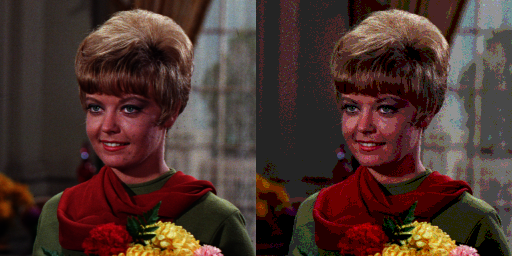

In [9]:
original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print('Image Depth Simulation')
print('--------------------------')
try:
  bitDepth = float(input('Input bit depth value: '))
except ValueError:
  print('Error, not a number')

bit = 2**bitDepth
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

result = cv.hconcat((original, gamma_image))
cv2_imshow(result)

Experiment 3

5 Images

The PSNR Value is  27.54809592611732  (dB)


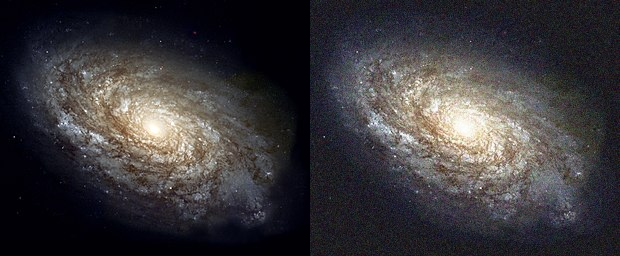

In [13]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

dst = cv_img[0]
noise_number = 4
for i in range(noise_number):
  if i == 0:
    pass
  else:
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
  mse = np.mean((original - compressed) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('The PSNR Value is ',psnr,' (dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

30 Images

The PSNR value is  27.525968241822625  (dB)


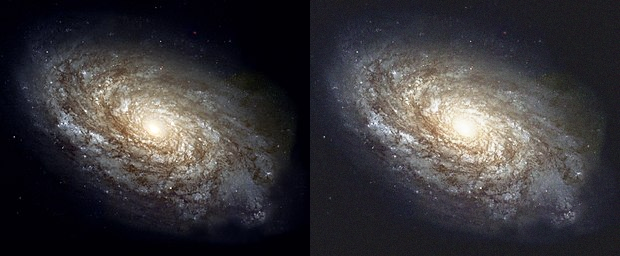

In [15]:
dst = cv_img[0]
noise_number = 29
for i in range(noise_number):
  if i == 0:
    pass
  else:
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('The PSNR value is ',psnr,' (dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

60 Images

The PSNR value is  27.49425111619459  (dB)


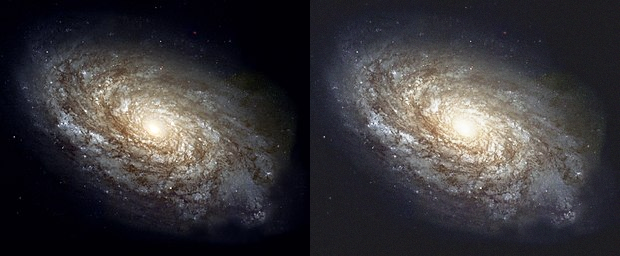

In [16]:
dst = cv_img[0]
noise_number = 59
for i in range(noise_number):
  if i == 0:
    pass
  else:
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('The PSNR value is ',psnr,' (dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

80 Images

The PSNR value is  27.499414273604987  (dB)


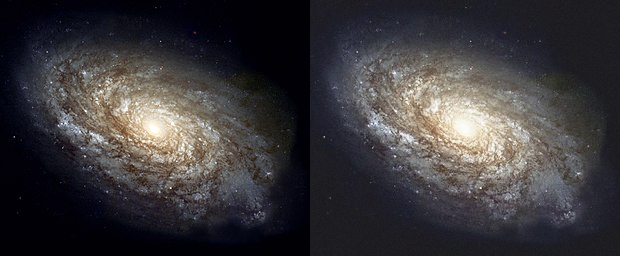

In [17]:
dst = cv_img[0]
noise_number = 79
for i in range(noise_number):
  if i == 0:
    pass
  else:
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('The PSNR value is ',psnr,' (dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

100 Images

The PSNR value is  27.498355068195615  (dB)


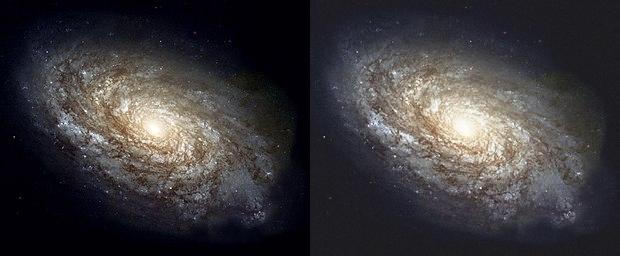

In [18]:
dst = cv_img[0]
noise_number = 99
for i in range(noise_number):
  if i == 0:
    pass
  else:
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('The PSNR value is ',psnr,' (dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Experiment 4

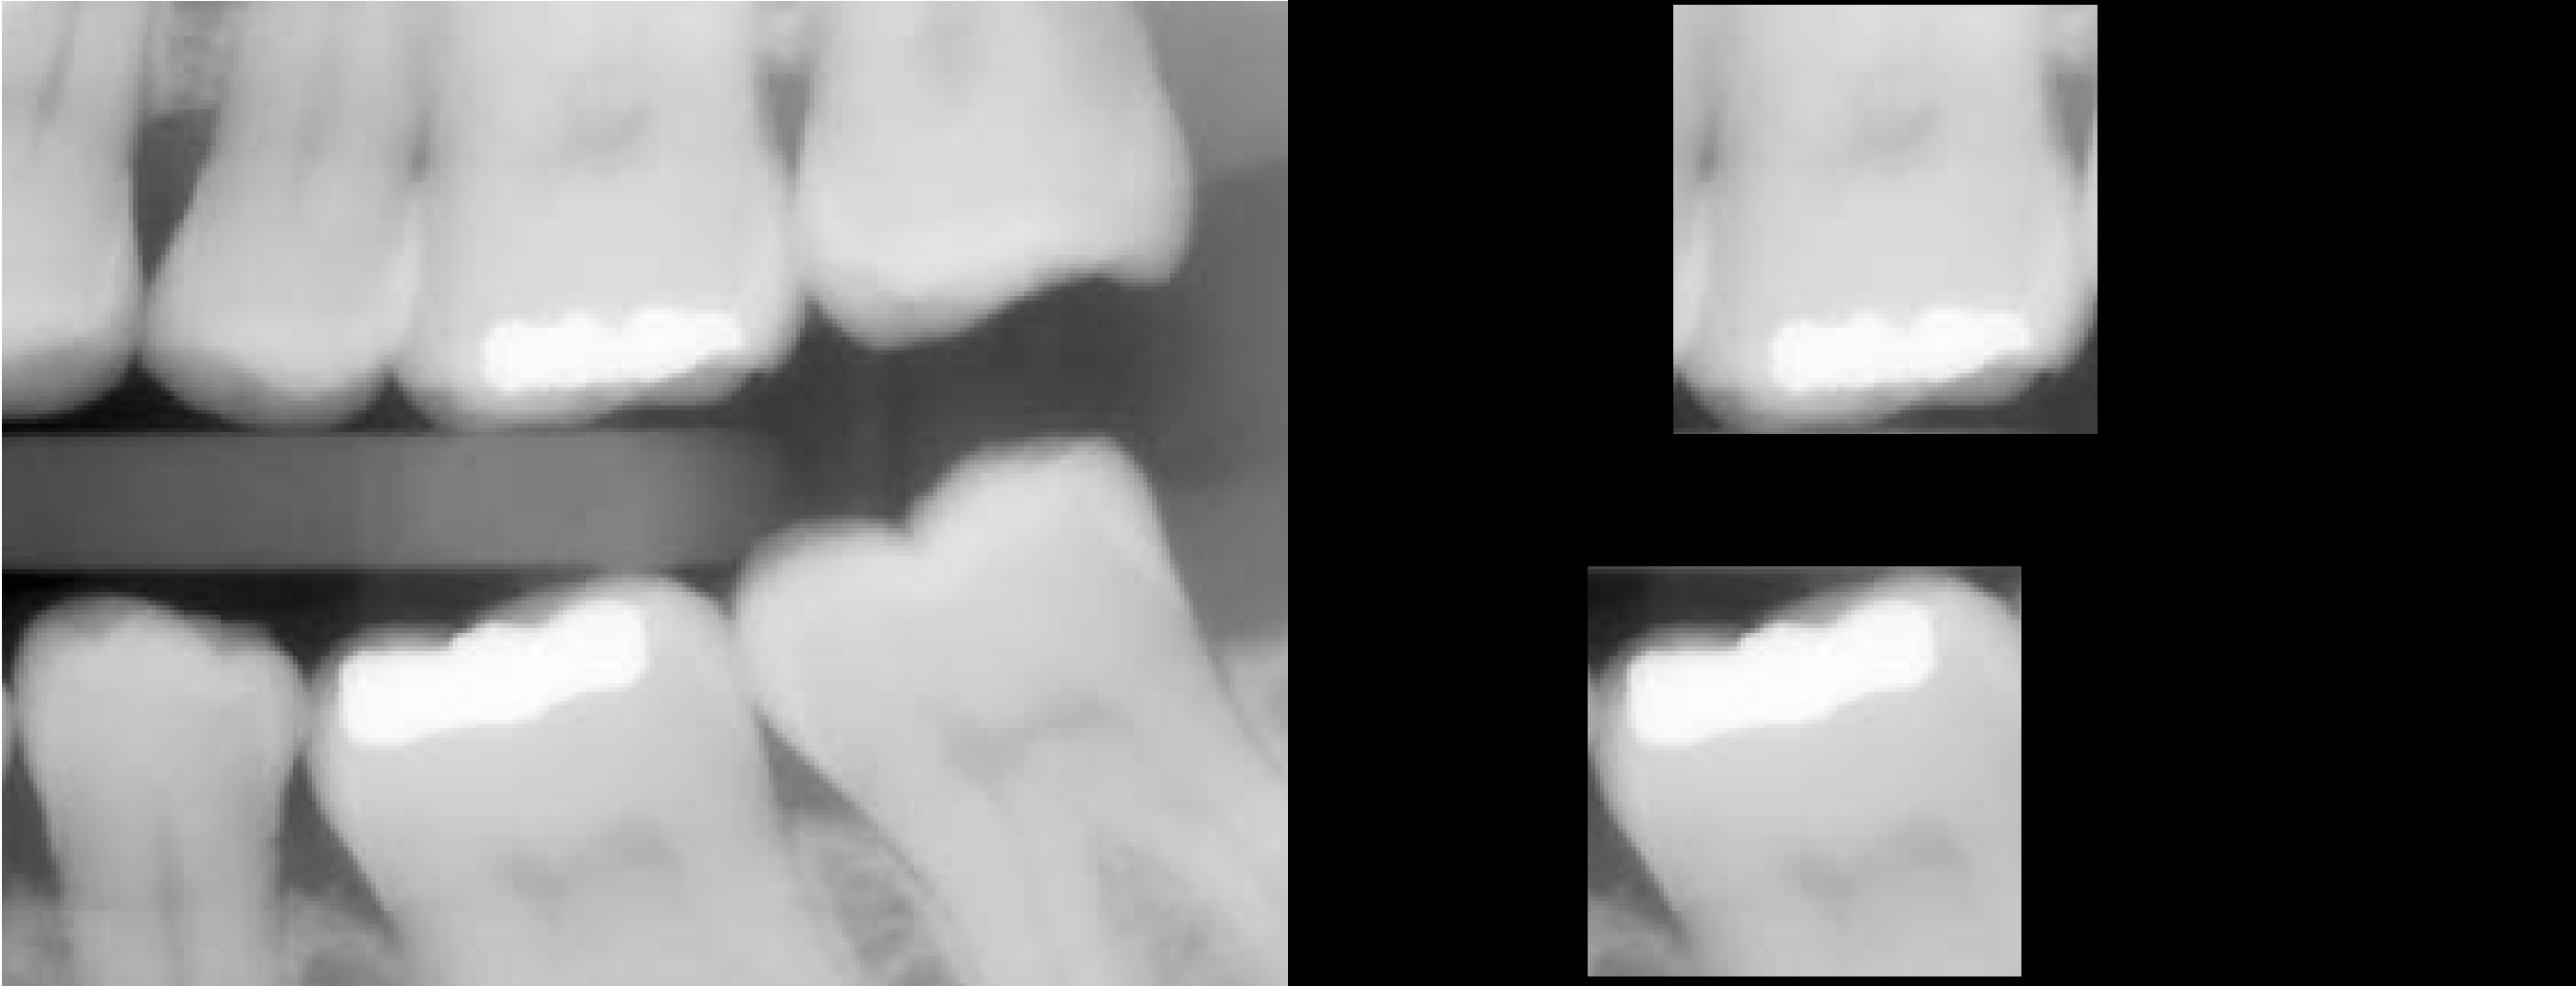

In [21]:
img_t = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = img_t & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img_t & mask1

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)